# 自編碼器(Auto-Encoder)



## 去雜訊自編碼器(Denoising Autoencoder)
* 匯入數字手寫資料集
* 將維度從28*28改為784
* 將訓練與測試集添加高斯雜訊
* 繪出原始影像與雜訊影像

In [ ]:
from keras.datasets import mnist

(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [ ]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

print(x_Train.shape)

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

(60000, 784)


In [ ]:
import numpy as np

noise_factor = 0.5
x_train_noisy = x_Train_normalize + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_Train_normalize.shape)
x_test_noisy = x_Test_normalize + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_Test_normalize.shape)

print(x_train_noisy.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

(60000, 784)


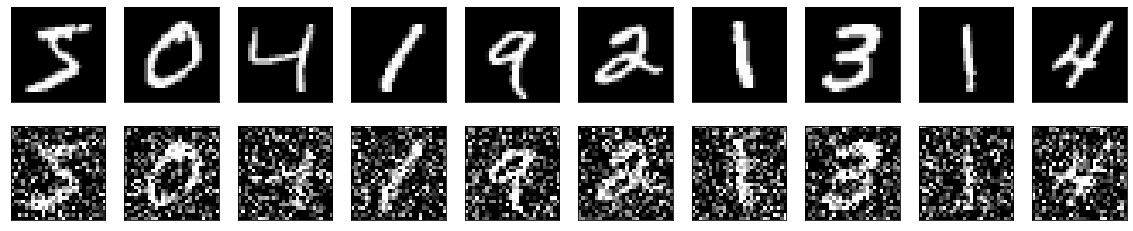

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 原始影像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_Train_normalize[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 雜訊影像
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [ ]:
from keras.layers import Input, Dense  
from keras.models import Model         

encoding_dim = 50                #壓縮特徵為50維度
input_img = Input(shape=(784,))  #定義輸入層為784

#建立函數式模型
encoded = Dense(encoding_dim, activation='relu')(input_img) #編碼層
decoded = Dense(784, activation='sigmoid')(encoded) #解碼層

#建構自編碼模型
autoencoder = Model(inputs=input_img, outputs=decoded)
print("\n1. 模型架構 Autoencoder")
autoencoder.summary()

#建構編碼模型
encoder = Model(inputs=input_img, outputs=encoded)
print("\n2. 模型架構 Ecoder")
encoder.summary()

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

#建構解碼模型
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
print("\n3. 模型架構 Decoder")
decoder.summary()


1. 模型架構 Autoencoder
Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_19 (Dense)             (None, 784)               39984     
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________

2. 模型架構 Ecoder
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                39250     

## 指定訓練集評量方式來編譯模型
* 損失函數 (Loss function)
* 優化器 (Optimizer)

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
train_history = autoencoder.fit(x_Train_normalize, x_Train_normalize, epochs=50, batch_size=256, 
                shuffle=True, validation_data=(x_Test_normalize, x_Test_normalize))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.3588 - val_loss: 0.2693
Epoch 2/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.2603 - val_loss: 0.2481
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.2373 - val_loss: 0.2245
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.2163 - val_loss: 0.2062
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.2009 - val_loss: 0.1934
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1899 - val_loss: 0.1840
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1813 - val_loss: 0.1761
Epoch 8/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1741 - val_loss: 0.1695
Epoch 9/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1680 - val_loss: 0.1638
Epoch

## **繪製學習曲線**

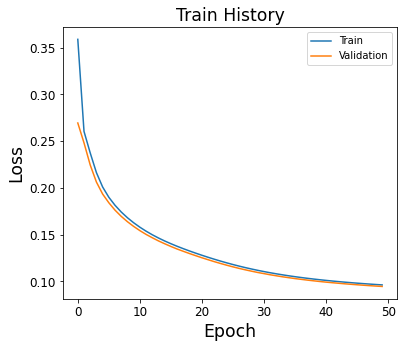

In [ ]:
def show_train_history(train_history, train, validation):  
    plt.figure(figsize=(6, 5))
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History',size ='xx-large') 
    plt.xticks(rotation=0,size ='large')
    plt.yticks(rotation=0,size ='large')
    plt.ylabel('Loss',size = 'xx-large')  
    plt.xlabel('Epoch',size ='xx-large')  
    plt.legend(['Train', 'Validation'], loc = 'best')  
    plt.show() 

show_train_history(train_history,'loss','val_loss')

## **將測試集帶入模型生成影像**

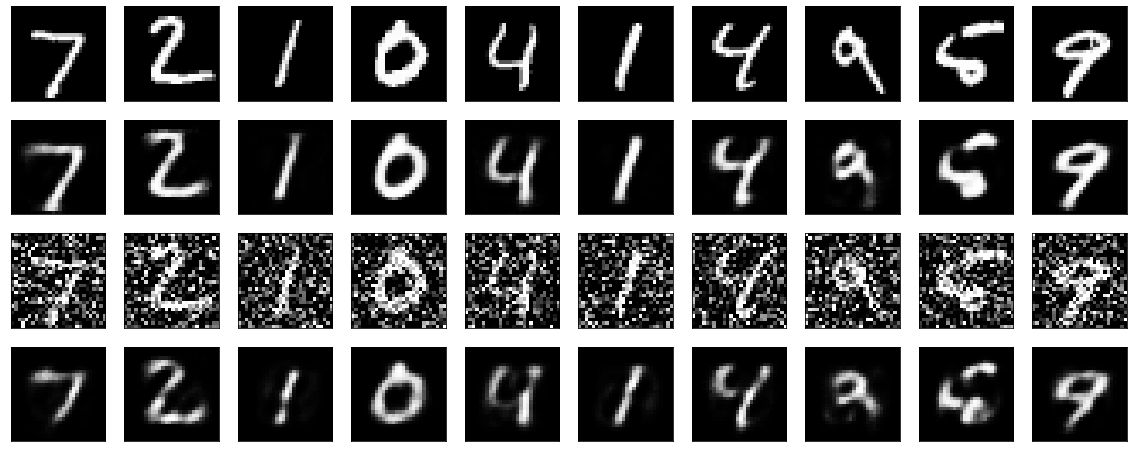

In [ ]:
#原始測試集影像帶入自編碼器
encoded_imgs = encoder.predict(x_Test_normalize)
decoded_imgs = decoder.predict(encoded_imgs)

#雜訊的測試集影像帶入自編碼器
encoded_noisy_imgs = encoder.predict(x_test_noisy)
decoded_noisy_imgs = decoder.predict(encoded_noisy_imgs)

n = 10
plt.figure(figsize=(20, 8))

for i in range(n):
    # 原始影像
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_Test_normalize[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 原始影像經自編碼器生成的影像
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 雜訊的影像
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 雜訊的影像經自編碼器生成的影像
    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(decoded_noisy_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## **儲存模型與權重**

In [ ]:
from keras.models import load_model

#儲存模型
encoder.save('encoder.h5')
decoder.save('decoder.h5')

#載入模型
from tensorflow.keras.models import load_model

encoder = load_model('encoder.h5', compile=False)
decoder = load_model('decoder.h5', compile=False)